In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/word2vec-nlp-tutorial/testData.tsv.zip
/kaggle/input/word2vec-nlp-tutorial/sampleSubmission.csv
/kaggle/input/word2vec-nlp-tutorial/unlabeledTrainData.tsv.zip
/kaggle/input/word2vec-nlp-tutorial/labeledTrainData.tsv.zip


## Submission File Check

In [ ]:
sub = pd.read_csv('/kaggle/input/word2vec-nlp-tutorial/sampleSubmission.csv')
sub.head()

,id,sentiment
0,12311_10,0
1,8348_2,0
2,5828_4,0
3,7186_2,0
4,12128_7,0


## Data

In [ ]:
train = pd.read_csv('/kaggle/input/word2vec-nlp-tutorial/labeledTrainData.tsv.zip', delimiter='\t')
train.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [ ]:
test = pd.read_csv('/kaggle/input/word2vec-nlp-tutorial/testData.tsv.zip', delimiter='\t')
test.head()

,id,review
0,12311_10,Naturally in a film who's main themes are of m...
1,8348_2,This movie is a disaster within a disaster fil...
2,5828_4,"All in all, this is a movie for kids. We saw i..."
3,7186_2,Afraid of the Dark left me with the impression...
4,12128_7,A very accurate depiction of small time mob li...


## Preprocessing

In [ ]:
review = pd.concat([train['review'], test['review']])
review

0        With all this stuff going down at the moment w...
1        \The Classic War of the Worlds\" by Timothy Hi...
2        The film starts with a manager (Nicholas Bell)...
3        It must be assumed that those who praised this...
4        Superbly trashy and wondrously unpretentious 8...
                               ...                        
24995    Sony Pictures Classics, I'm looking at you! So...
24996    I always felt that Ms. Merkerson had never got...
24997    I was so disappointed in this movie. I am very...
24998    From the opening sequence, filled with black a...
24999    This is a great horror film for people who don...
Name: review, Length: 50000, dtype: object

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tk = Tokenizer()
tk.fit_on_texts(review)

In [ ]:
tseq = tk.texts_to_sequences(review)
tseq[0]

[16,
 29,
 11,
 517,
 166,
 175,
 30,
 1,
 565,
 16,
 12486,
 198,
 654,
 2655,
 5,
 24,
 207,
 147,
 1,
 1036,
 640,
 133,
 2,
 46,
 287,
 1,
 25421,
 2,
 287,
 17516,
 172,
 273,
 10,
 39,
 178,
 5,
 76,
 3,
 764,
 2618,
 82,
 11,
 219,
 35,
 10,
 190,
 13,
 62,
 593,
 8,
 1,
 3971,
 39,
 5,
 273,
 94,
 53,
 56,
 323,
 723,
 28,
 6,
 2415,
 38,
 1324,
 17516,
 6,
 173,
 4848,
 173,
 785,
 19,
 60,
 10,
 382,
 166,
 5,
 63,
 30,
 1,
 443,
 50,
 9,
 13,
 1894,
 613,
 47,
 4,
 9,
 45,
 1284,
 3639,
 42,
 29378,
 558,
 944,
 1,
 3599,
 2,
 81,
 1,
 595,
 750,
 4,
 1479,
 23,
 74,
 71839,
 7,
 7,
 2141,
 1186,
 18,
 4,
 265,
 11,
 6,
 29,
 42,
 498,
 1834,
 34,
 886,
 22,
 2628,
 37,
 12486,
 8,
 548,
 91,
 22,
 23,
 166,
 5,
 737,
 11,
 2,
 165,
 9,
 348,
 47,
 200,
 655,
 12486,
 32,
 35685,
 15,
 31140,
 5,
 1,
 232,
 4,
 11,
 17,
 18,
 12486,
 2,
 88,
 4,
 24,
 455,
 58,
 131,
 12,
 28,
 90,
 9,
 15,
 1,
 455,
 60,
 43,
 289,
 6,
 62,
 331,
 4,
 87,
 7,
 7,
 1,
 823,
 785,
 19,
 226,


before fixing maxlen param of tpad, lets check the length of each tseqs.<br>
300 is seemingly moderate for maxlen.

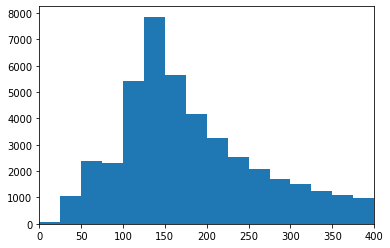

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlim(0, 400)
plt.hist([len(t) for t in tseq], bins=range(0, 401, 25))
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
tpad = pad_sequences(tseq, maxlen=300)
tpad[42]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [ ]:
train_x = tpad[:25000]
test = tpad[25000:]
train_y = train['sentiment']

In [ ]:
train_x.shape

(25000, 300)

## Simple RNN Model acc:0.76416

In [ ]:
model = Sequential()
model.add(Embedding(len(tk.word_index)+1, 256, input_length=300))
model.add(SimpleRNN(10))
model.add(Dense(1, activation='sigmoid'))
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')

In [ ]:
hist = model.fit(train_x, train_y, batch_size=40, epochs=5, validation_split=0.2)

In [ ]:
res = model.predict(test)
res

In [ ]:
sub['sentiment'] = (res > 0.5) * 1
sub.to_csv('res.csv', index=False)

## LSTM Model acc: 0.8496

In [ ]:
model = Sequential()
model.add(Embedding(len(tk.word_index)+1, 256, input_length=300))
model.add(LSTM(64, recurrent_dropout=0.1))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 256)          31808768  
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                82176     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 31,893,057
Trainable params: 31,893,057
Non-trainable params: 0
__________________________________________

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')

In [ ]:
hist = model.fit(train_x, train_y, batch_size=40, epochs=5, validation_split=0.2)

Epoch 1/5
500/500 [==============================] - 472s 940ms/step - loss: 0.4249 - acc: 0.7990 - val_loss: 0.3056 - val_acc: 0.8712
Epoch 2/5
500/500 [==============================] - 497s 994ms/step - loss: 0.1843 - acc: 0.9354 - val_loss: 0.3907 - val_acc: 0.8604
Epoch 3/5
500/500 [==============================] - 470s 940ms/step - loss: 0.1097 - acc: 0.9613 - val_loss: 0.4238 - val_acc: 0.8514
Epoch 4/5
500/500 [==============================] - 465s 931ms/step - loss: 0.1397 - acc: 0.9470 - val_loss: 0.4945 - val_acc: 0.8564
Epoch 5/5
500/500 [==============================] - 463s 925ms/step - loss: 0.0722 - acc: 0.9768 - val_loss: 0.5477 - val_acc: 0.8624


In [ ]:
res = model.predict(test)
res

array([[9.9981070e-01],
       [1.8072128e-04],
       [2.0793816e-01],
       ...,
       [6.8462214e-05],
       [9.9034607e-01],
       [4.8083961e-03]], dtype=float32)

In [ ]:
sub['sentiment'] = (res > 0.5) * 1
sub.to_csv('res.csv', index=False)

## Bidirectional LSTM Model acc:0.847

In [ ]:
model = Sequential()
model.add(Embedding(len(tk.word_index)+1, 256, input_length=300))
model.add(Bidirectional(LSTM(64, recurrent_dropout=0.1)))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 256)          31808768  
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               164352    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 31,977,281
Trainable params: 31,977,281
Non-trainable params: 0
__________________________________________

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')

In [ ]:
hist = model.fit(train_x, train_y, batch_size=40, epochs=5, validation_split=0.2)

Epoch 1/5
500/500 [==============================] - 830s 2s/step - loss: 0.4680 - acc: 0.7831 - val_loss: 0.3659 - val_acc: 0.8486
Epoch 2/5
500/500 [==============================] - 845s 2s/step - loss: 0.2414 - acc: 0.9118 - val_loss: 0.3441 - val_acc: 0.8720
Epoch 3/5
500/500 [==============================] - 859s 2s/step - loss: 0.1299 - acc: 0.9558 - val_loss: 0.3945 - val_acc: 0.8482
Epoch 4/5
500/500 [==============================] - 834s 2s/step - loss: 0.0559 - acc: 0.9819 - val_loss: 0.4612 - val_acc: 0.8596
Epoch 5/5
500/500 [==============================] - 878s 2s/step - loss: 0.0290 - acc: 0.9909 - val_loss: 0.5711 - val_acc: 0.8558


In [ ]:
res = model.predict(test)
res

array([[9.9999952e-01],
       [7.3087358e-05],
       [4.4102964e-01],
       ...,
       [2.5710464e-04],
       [9.9315137e-01],
       [6.7028403e-03]], dtype=float32)

In [ ]:
sub['sentiment'] = (res > 0.5) * 1
sub.to_csv('res.csv', index=False)